In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv


# Introduction

## Project Overview

The gaming industry has evolved dramatically over the past few decades, with numerous platforms competing for popularity and market share. Companies such as **Nintendo**, **Sony**, and **Microsoft** have introduced iconic gaming consoles that have each left a significant mark on the industry. This project aims to analyze the **popularity trends of gaming platforms** over time by grouping them under these three companies and examining their changing market shares across different eras.

## Purpose and Goals

Our goal is to understand:
- The rise and fall in popularity of gaming platforms grouped by **Nintendo, Sony, and Microsoft**.
- Factors influencing the success of these platforms, such as **release year**, **user ratings**, **game genres**, and **regional sales**.

By normalizing sales data across release years, I can uncover patterns and determine which factors significantly impacted the performance of each company's gaming platforms.

## Data Source

The dataset used in this project is the [Video Game Sales with Ratings](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings) from Kaggle. This dataset contains sales figures and ratings for various gaming platforms, providing a rich source of information to explore and analyze trends.

## Problem Statement

I will address the following questions:
1. How has the market share of Nintendo, Sony, and Microsoft platforms changed over time?
2. Which factors contribute most to the success of platforms for each company?
3. Can we predict the popularity of a platform based on historical sales data and associated features?

This project provides insights into how companies can strategize for future growth based on historical platform popularity trends by analyzing these questions.



## Data Overview

## Dataset Description

The Dataset used in this project, [Video Game Sales with Ratings](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings), provides:
Sales data.
User and critic ratings.
Other key information for various video games across multiple platforms.
This Dataset includes games released from the 1980s to 2016, covering different generations of gaming consoles.

### Key Columns in the Dataset

- **Name**: Title of the game.
- **Platform**: Platform on which the game was released (e.g., PS2, Wii, Xbox).
- **Year_of_Release**: The year the game was released.
- **Genre**: The genre of the game (e.g., Action, Sports, RPG).
- **Publisher**: The company that published the game.
- **NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales**: Sales figures in millions for North America, Europe, Japan, other regions, and globally.
- **Critic_Score, Critic_Count**: Average critic score and the number of critic reviews for the game.
- **User_Score, User_Count**: Average user score and the number of user reviews.
- **Developer**: The company that developed the game.
- **Rating**: ESRB rating, indicating the appropriate age group for the game.

### Data Quality and Initial Observations

Before proceeding with the analysis, I inspected the Dataset for completeness and consistency. Here are some initial observations:
- **Missing Values**: Some columns, including `Critic_Score`, `User_Score`, and `Developer`, contain missing values. I will address these in the data cleaning phase.
- **Data Types**: The `User_Score` column, originally a string, was converted to numeric for analysis purposes.
- **Outliers**: Some games, particularly popular titles, show significantly high global sales figures, potentially skewing the data. I will assess how to handle these outliers in the EDA phase if necessary.



In [2]:
# Importing
import pandas as pd

# Loading the dataset
file_path = '/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to verify the import
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

## Overview of Sales and Release Trends

To gain an initial understanding of the data, I will start by examining the overall sales and release trends. This will help identify any patterns or notable trends across different years and platforms.

### Total Global Sales by Release Year

The following plot shows the total global sales across different release years.

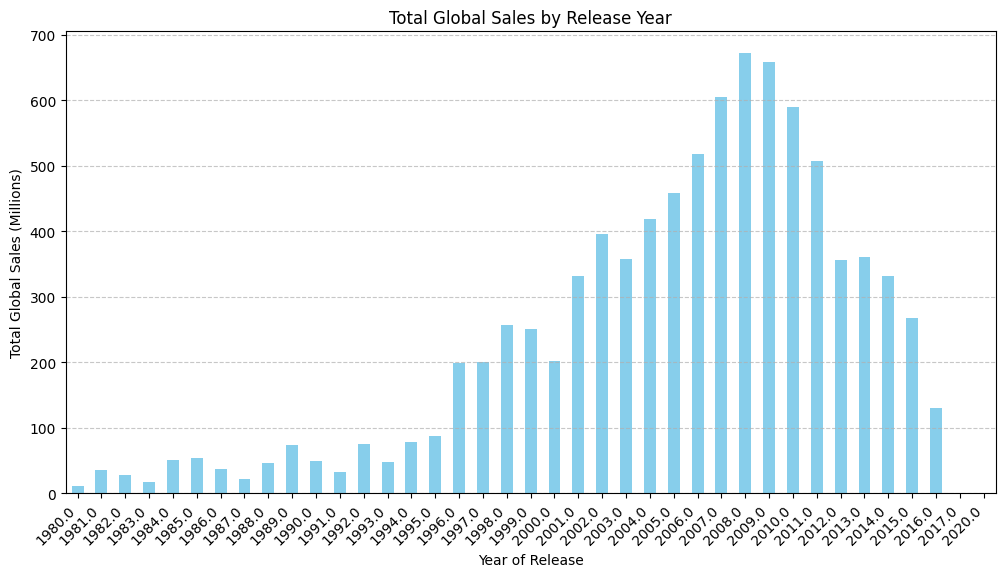

In [3]:
import matplotlib.pyplot as plt

# Total global sales by release year
sales_trends_by_year = data.groupby('Year_of_Release')['Global_Sales'].sum().dropna()

# Plotting the total global sales by release year
plt.figure(figsize=(12, 6))
sales_trends_by_year.plot(kind='bar', color='skyblue')
plt.title("Total Global Sales by Release Year")
plt.xlabel("Year of Release")
plt.ylabel("Total Global Sales (Millions)")

# Display all years on the x-axis
plt.xticks(rotation=45, ha="right") 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Analysis of Total Global Sales by Release Year

 - **2000 - 2008**:
   - There is a noticeable increase in global sales starting from the early 2000s, peaking around 2008. This period aligns with the release of several successful gaming consoles, such as the PlayStation 2, Nintendo DS, and Xbox 360, which contributed significantly to the growth.
   - The sharp increase in sales suggests that the gaming industry experienced a "golden age" during this period, driven by widespread console adoption, improved graphics, and the release of iconic games.

2. **2008 - 2014**:
   - After reaching the peak in 2008, the global sales start to decline gradually. This may be due to several factors, including market saturation, economic downturns, or the rise of mobile gaming, which shifted consumer interest away from traditional consoles.
   - Newer consoles such as the PlayStation 3 and Xbox One were released around this time but did not achieve the same explosive growth as previous generations, possibly because of a more competitive and diverse gaming market.

3. **2014 - 2016**:
   - Sales continue to decline through 2016, possibly reflecting the transition period as newer consoles were entering the market (e.g., PlayStation 4, Xbox One) and the industry shifted towards digital distribution, which is not fully captured in this dataset.
   - Additionally, the rise of online platforms, indie games, and the shift towards digital content means that physical sales might not fully represent the industry's success during this period.


### Platform Popularity Trends Analysis

To further investigate the popularity of different gaming platforms over time, I calculated the yearly total global sales and each platform’s share of that total. This approach helps to normalize the sales figures across years, allowing us to observe relative popularity trends without the influence of overall market growth or decline.

The steps involved in this analysis are as follows:

1. **Total Sales by Year**: Calculating the total global sales for each release year provides a baseline for normalizing platform sales.
2. **Platform Sales Share**: By summing the sales for each platform by year and dividing by the total yearly sales, I derived each platform’s relative share. This approach highlights the market share each platform held in each year, accounting for fluctuations in the overall industry size.
3. **Data Transformation for Plotting**: The normalized sales share data is reshaped to simplify plotting, resulting in a stacked area plot that shows the relative popularity of each platform over time.

<Figure size 1400x1000 with 0 Axes>

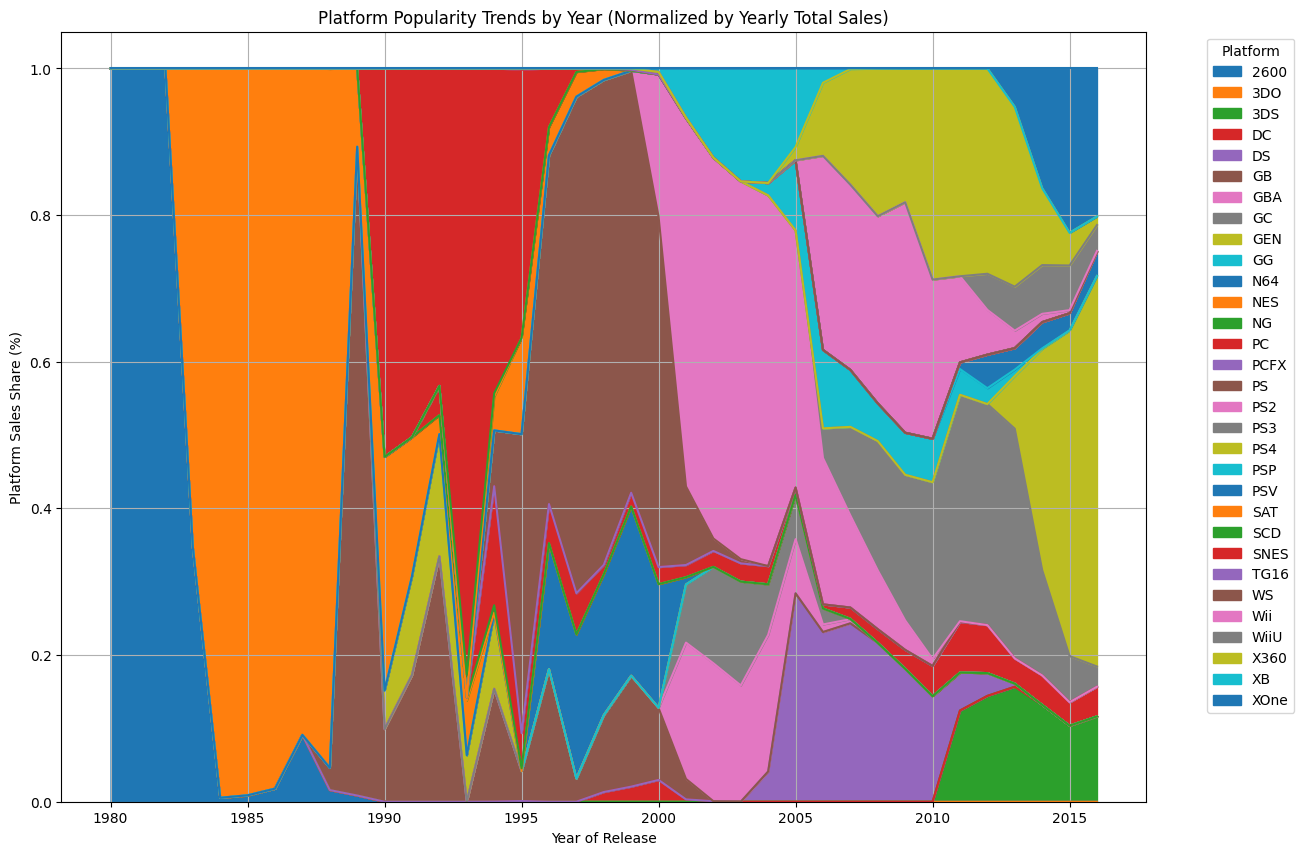

In [4]:
# Filtering data to include only up to 2016
data = data[data['Year_of_Release'] <= 2016]

# Calculating total sales per year
total_sales_per_year = data.groupby('Year_of_Release')['Global_Sales'].sum()

# Calculating platform sales per year, then normalizing by total sales per year
platform_sales_by_year = data.groupby(['Year_of_Release', 'Platform'])['Global_Sales'].sum()
platform_sales_share = platform_sales_by_year.div(total_sales_per_year, level='Year_of_Release')

# Converting the data for easier plotting
platform_sales_share_unstacked = platform_sales_share.unstack().fillna(0)

# Plotting platform popularity trends over time (normalized by year)
plt.figure(figsize=(14, 10))
platform_sales_share_unstacked.plot(kind='area', stacked=True, figsize=(14, 10))
plt.title("Platform Popularity Trends by Year (Normalized by Yearly Total Sales)")
plt.xlabel("Year of Release")
plt.ylabel("Platform Sales Share (%)")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Top Platforms and Company Grouping Analysis

To delve deeper into platform popularity, I performed additional analysis focusing on the top 10 platforms and grouped platforms by company (Nintendo, Sony, Microsoft) to observe trends across companies.

The steps are as follows:

1. **Top 10 Platforms Selection**: First, I identified the top 10 platforms based on their total global sales, providing a focused view on the most influential gaming platforms.

2. **Top 10 Platforms Popularity Trends**: By filtering the normalized sales share data for these top platforms, I created a stacked area plot. This visualization emphasizes how these top platforms have dominated the gaming market over time, reflecting shifts in consumer preferences and the success of specific consoles in different periods.

3. **Company Grouping and Aggregation**: To understand broader trends across major companies, I grouped platforms by company (Nintendo, Sony, Microsoft) based on the updated platform lists. By summing the sales shares for each company, I generated a view of how each company’s platforms collectively contributed to their popularity over time.

4. **Company Trends Plot**: The final stacked area plot represents the yearly sales share of platforms by company. This visualization highlights how each company’s platform lineup has performed relative to competitors, showcasing market dominance and changes in company popularity across different gaming generations.

<Figure size 1400x800 with 0 Axes>

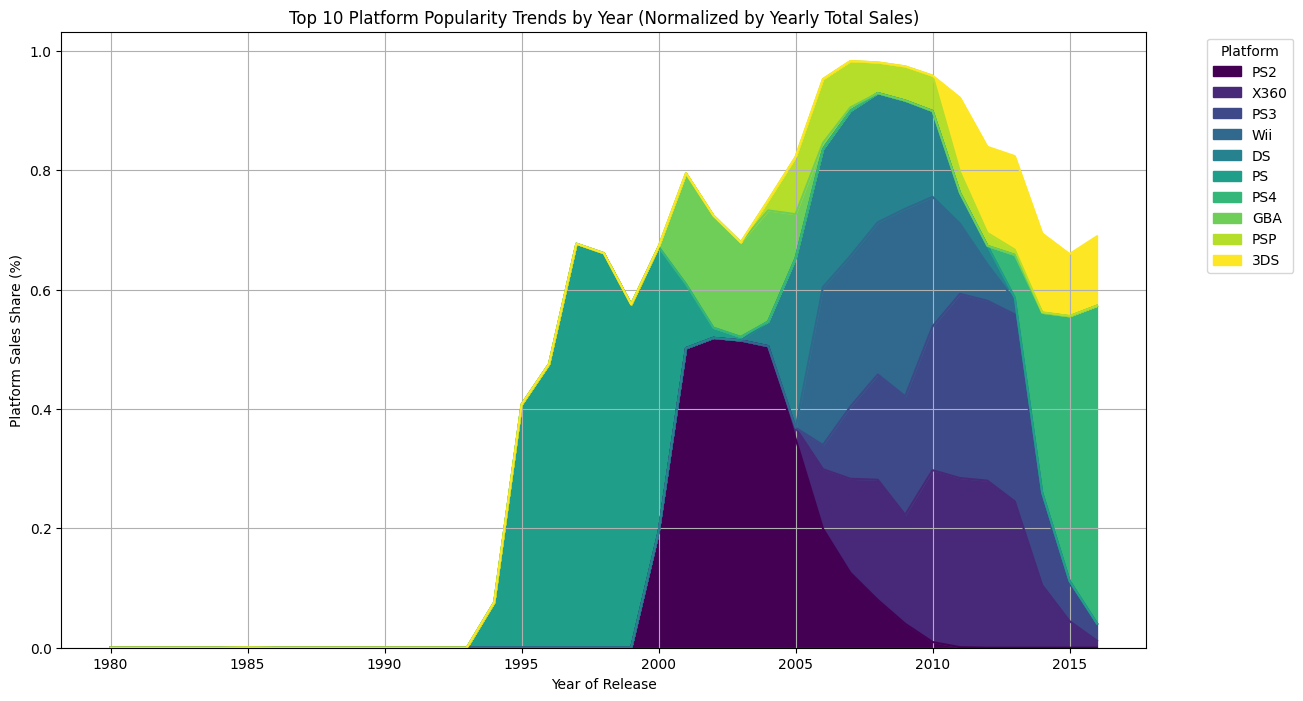

In [5]:
# Selecting top 10 platforms based on total global sales
top_10_platforms = platform_sales_by_year.groupby('Platform').sum().nlargest(10).index

# Filtering data to include only the top 10 platforms
top_10_platform_sales_share = platform_sales_share_unstacked[top_10_platforms]

# Plotting the popularity trends for top 10 platforms over time (normalized by yearly total sales)
plt.figure(figsize=(14, 8))
top_10_platform_sales_share.plot(kind='area', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title("Top 10 Platform Popularity Trends by Year (Normalized by Yearly Total Sales)")
plt.xlabel("Year of Release")
plt.ylabel("Platform Sales Share (%)")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

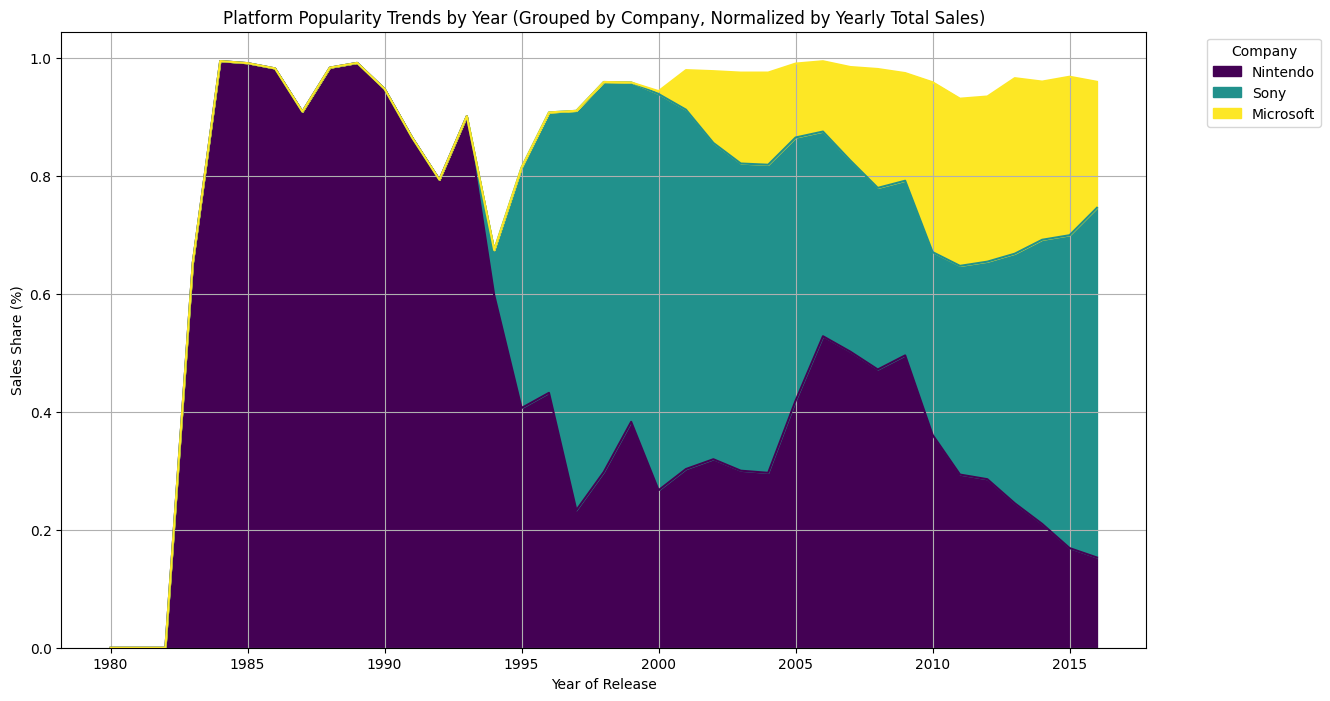

In [6]:
# Updating platform groups without 'Switch' as it is not present in the data
platform_groups_updated = {
    'Nintendo': ['Wii', 'WiiU', 'DS', '3DS', 'GC', 'NES', 'SNES', 'N64', 'GB', 'GBA'],
    'Sony': ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV'],
    'Microsoft': ['XB', 'X360', 'XOne']
}

# Grouping the sales shares by company
grouped_sales_share_updated = pd.DataFrame(index=platform_sales_share_unstacked.index)
for group, platforms in platform_groups_updated.items():
    grouped_sales_share_updated[group] = platform_sales_share_unstacked[platforms].sum(axis=1)

# Plotting the grouped platform popularity trends over time
plt.figure(figsize=(14, 8))
grouped_sales_share_updated.plot(kind='area', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title("Platform Popularity Trends by Year (Grouped by Company, Normalized by Yearly Total Sales)")
plt.xlabel("Year of Release")
plt.ylabel("Sales Share (%)")
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Analysis of Platform Popularity Trends by Company (Data up to 2016)

This stacked area chart presents the shifts in platform popularity among Nintendo, Sony, and Microsoft over time, based on yearly normalized sales shares. The data is restricted to releases up to 2016, prior to the launch of the Nintendo Switch in 2017. As a result, the chart does not reflect post-2016 market dynamics, which may impact the interpretation of recent trends.

1. **Nintendo’s Initial Dominance (1980s - Early 1990s)**:
   - In the early years, Nintendo held a near-total market dominance, driven by platforms like the NES and SNES. These consoles were pivotal in establishing Nintendo's early lead and defining the gaming industry's growth.
   - This period reflects Nintendo's strong position in the gaming market, with minimal competition from other major players.

2. **Sony’s Ascendancy (Mid-1990s - 2010)**:
   - From the mid-1990s onward, Sony became a significant player, marked by the successful launch of the PlayStation series. By the late 1990s and through the 2000s, Sony's market share grew rapidly, eventually surpassing Nintendo.
   - The PlayStation 2, in particular, achieved remarkable success in the early 2000s, while the PlayStation 3 maintained Sony's lead. This shift indicates Sony's strategic success in targeting a broader audience and offering diverse games.

3. **Microsoft’s Competitive Entry (Mid-2000s - 2016)**:
   - Microsoft entered the market in the mid-2000s with the Xbox series, carving out a substantial share, especially in North America. The Xbox 360, in particular, was a strong competitor to Sony's PlayStation 3.
   - While Microsoft's share did not reach the same dominance as Sony or Nintendo, it maintained a steady presence, reflecting the company's effective positioning within the Western gaming market.

4. **Recent Trends and Data Limitations (2010 - 2016)**:
   - Towards the latter part of the chart, Nintendo's share shows a slight resurgence, but it's essential to note that this data stops at 2016, just before the launch of the Nintendo Switch in 2017. The Switch's release significantly boosted Nintendo's market presence, which is not reflected here.
   - Additionally, the chart does not include Sony's PlayStation 5 or Microsoft's Xbox Series X|S, which were released after 2016. Therefore, this visualization does not capture the post-2016 market dynamics, especially Nintendo's renewed success with the Switch.

### Platform Distribution

To understand the dataset’s platform diversity, I will also examine the distribution of games across different platforms and their total sales. 

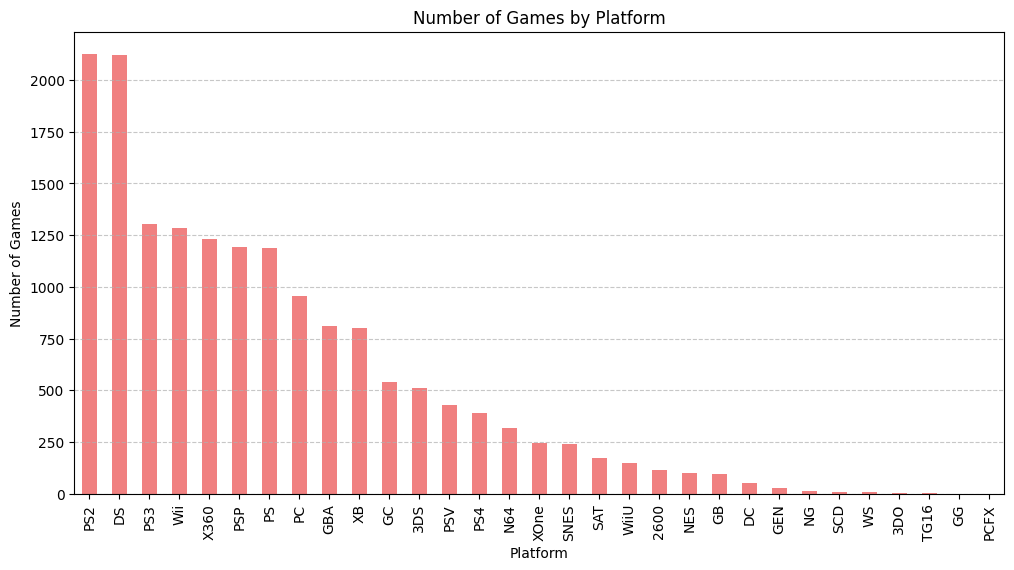

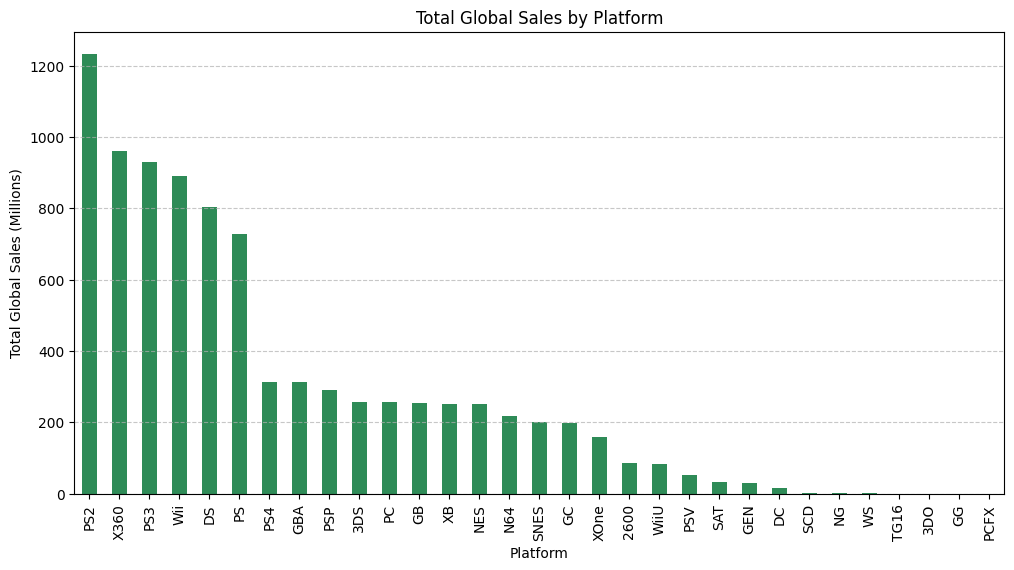

In [7]:
# Platform distribution based on total number of games and global sales
platform_counts = data['Platform'].value_counts()
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Plotting platform distribution by game count
plt.figure(figsize=(12, 6))
platform_counts.plot(kind='bar', color='lightcoral')
plt.title("Number of Games by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting platform distribution by total global sales
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar', color='seagreen')
plt.title("Total Global Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Total Global Sales (Millions)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Platform Distribution Analysis

 -  **Game Count vs. Sales Success**: 
   - The PlayStation 2 (PS2) has the highest game count and also leads in total sales, indicating its strong market presence and popularity during its era.
   - The Nintendo DS and PlayStation 3 follow closely in terms of game count, showing that these platforms also had extensive libraries of games.

 - **Sales Outliers**:
   - Although platforms like the Xbox 360 and Wii have relatively fewer games compared to the PS2, they still show very high total sales. These platforms had popular titles with high sales volumes, potentially due to iconic games or successful exclusive titles.
   - The Nintendo Wii, despite a smaller game library, achieved similar sales to the Nintendo DS, indicating that a smaller selection of well-targeted, high-quality games can still achieve impressive sales.

 - **Platform Popularity Trends**:
   - Older platforms such as the SNES and NES have fewer games in the dataset, which may reflect the limitations in available data or changes in game publishing trends over time. However, their total sales remain significant, highlighting their impact in the early years of console gaming.
   - Newer platforms like the Xbox One and PlayStation 4 have lower total sales in this dataset, likely due to the limited time frame covered (up to 2016) and the platforms’ recent release around that period.


## Identifying the Deep Learning Problem

### Problem Definition

The primary goal of this project is to identify key success factors for gaming platforms under Nintendo, Sony, and Microsoft. By analyzing features such as **platform**, **genre**, **user scores**, and **release year**, I aim to uncover trends in platform popularity and sales. The objective is to leverage these insights to develop a predictive model that can estimate a platform's potential success based on historical data.

### Selection of Analysis Method

To achieve this, I plan to experiment with different deep learning models:
- **Recurrent Neural Networks (RNN)**: Useful for capturing sequential patterns in time-series data, which can help in analyzing release year trends.
- **Multilayer Perceptron (MLP)**: A general neural network model that can be applied to tabular data, allowing for feature interaction analysis across various attributes.


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Converting User_Score to numeric, setting errors='coerce' to handle non-numeric values by converting them to NaN
data['User_Score'] = pd.to_numeric(data['User_Score'], errors='coerce')

# Label encoding for categorical features
label_encoders = {}
categorical_features = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    data[feature] = label_encoders[feature].fit_transform(data[feature].astype(str))

# Filling missing values without inplace
data['Critic_Score'] = data['Critic_Score'].fillna(data['Critic_Score'].mean())
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].mean())

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['Critic_Score', 'User_Score', 'Global_Sales']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Displaying the transformed dataset
data.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,26,2006.0,10,361,41.36,28.96,3.77,8.45,52.608511,0.722405,51.0,8.650057e-01,322.0,1008,1
1,Super Mario Bros.,11,1985.0,4,361,29.08,3.58,6.81,0.77,25.474529,0.000000,NaN,8.793701e-16,NaN,1674,8
2,Mario Kart Wii,26,2008.0,6,361,15.68,12.76,3.79,3.29,22.446097,1.341111,73.0,1.162031e+00,709.0,1008,1
3,Wii Sports Resort,26,2009.0,10,361,15.61,10.93,3.28,2.95,20.681650,1.134876,73.0,8.650057e-01,192.0,1008,1
4,Pokemon Red/Pokemon Blue,5,1996.0,7,361,11.27,8.89,10.22,1.00,19.783386,0.000000,NaN,8.793701e-16,NaN,1674,8


## Feature Correlation Analysis

To build an effective predictive model, it is important to understand the relationships between various features and the target variable, `Global_Sales`. By analyzing the correlations, I aim to identify which features are most strongly associated with global sales.

### Correlation Matrix

The following heatmap displays the correlation matrix for numerical features, including `Critic_Score`, `User_Score`, and regional sales (`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`). Features with a high correlation to `Global_Sales` may be valuable predictors in the model.


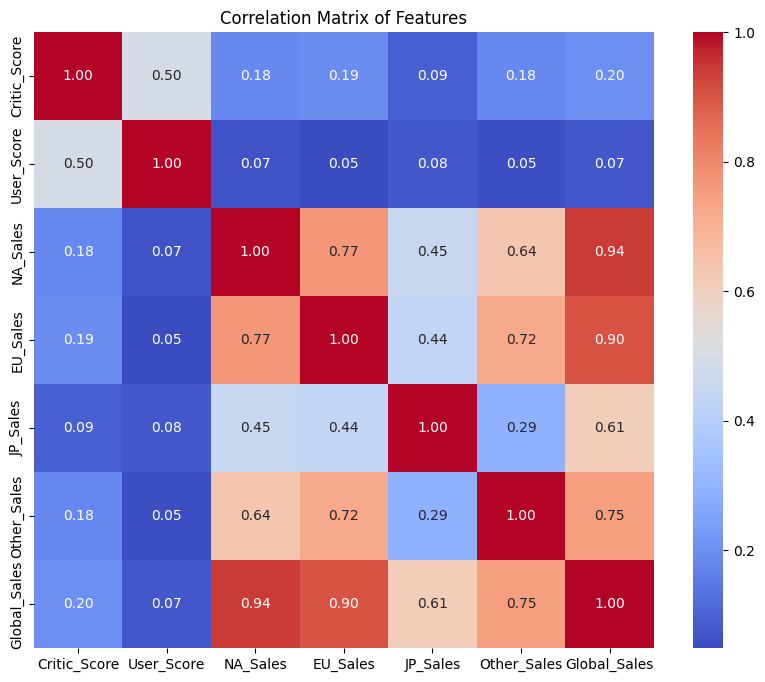

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical features to analyze correlations
numerical_features = ['Critic_Score', 'User_Score', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Calculating the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

### Correlation Matrix Analysis

The correlation matrix highlights key relationships among features:

- **Regional Sales Impact**: `NA_Sales` and `EU_Sales` have a strong positive correlation with `Global_Sales` (0.94 and 0.90, respectively), indicating that North American and European markets are major drivers of global sales.
- **Moderate Influence of Japan**: `JP_Sales` shows a moderate correlation (0.61) with `Global_Sales`, suggesting Japan has an impact but is less influential than North America and Europe.
- **Low Correlation with Scores**: Both `Critic_Score` and `User_Score` have low correlations with `Global_Sales` (0.20 and 0.07), implying that higher review scores do not directly equate to higher sales.

### Impact of Categorical Features on Global Sales

Understanding the influence of categorical features such as `Platform`, `Genre`, and `Rating` on `Global_Sales` provides insight into the popularity of different categories and their sales performance.

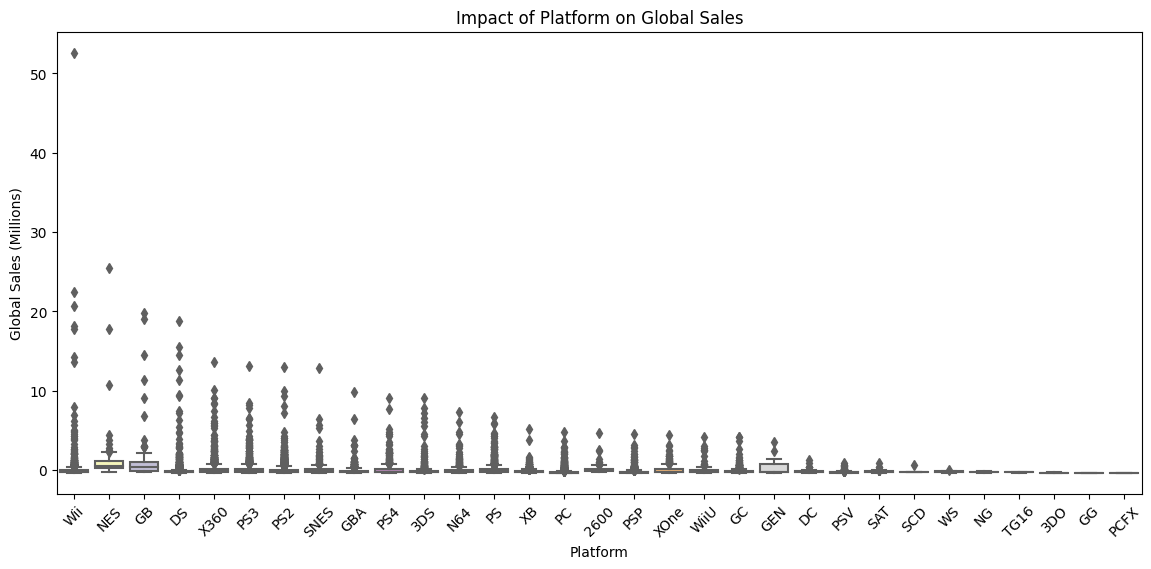

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping platform labels again, if necessary
platform_mapping = {index: label for index, label in enumerate(label_encoders['Platform'].classes_)}
data['Platform_Label'] = data['Platform'].map(platform_mapping)

# Plotting the impact of Platform on Global Sales with platform names as labels
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='Platform_Label', y='Global_Sales', palette="Set3")
plt.title("Impact of Platform on Global Sales")
plt.xlabel("Platform")
plt.ylabel("Global Sales (Millions)")
plt.xticks(rotation=45)
plt.show()

The boxplot illustrates the distribution of global sales for each platform:

- **High-Performing Platforms**: Platforms such as the **Wii**, **NES**, **DS**, **GB**, and **PS2** show higher median sales and more extreme outliers, indicating that these platforms have hosted highly successful games with significant sales.
- **Moderate Sales Platforms**: Platforms like **X360**, **PS3**, and **PS4** also display moderate levels of sales but have fewer extreme outliers, suggesting a stable but less extreme success compared to high-performing platforms.
- **Low Sales Platforms**: Several platforms, including **PSV**, **SAT**, and **TG16**, show consistently low sales with minimal variation. This suggests limited commercial success on these platforms.

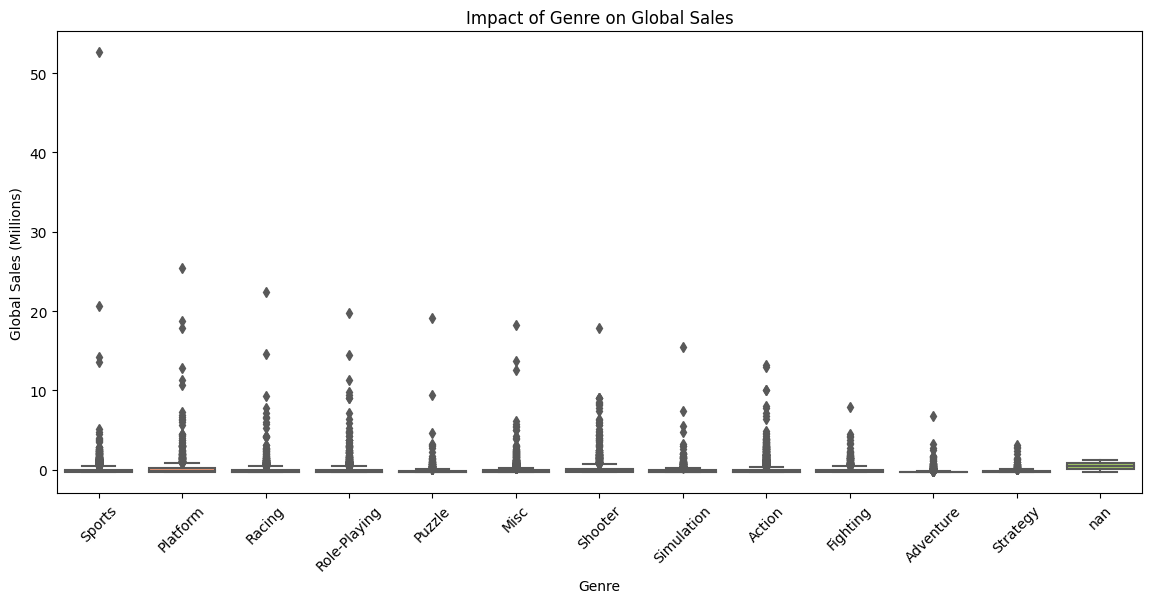

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a mapping from encoded values back to genre names
genre_mapping = {index: label for index, label in enumerate(label_encoders['Genre'].classes_)}
data['Genre_Label'] = data['Genre'].map(genre_mapping)

# Plotting the impact of Genre on Global Sales with readable genre names
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='Genre_Label', y='Global_Sales', palette="Set2")
plt.title("Impact of Genre on Global Sales")
plt.xlabel("Genre")
plt.ylabel("Global Sales (Millions)")
plt.xticks(rotation=45)
plt.show()

### Impact of Genre on Global Sales

- **High-Selling Genres**: Genres such as **Sports**, **Platform**, and **Racing** exhibit higher median sales and more frequent outliers, suggesting these genres contain highly successful titles with significant global sales.
- **Moderate to Low-Selling Genres**: Genres like **Strategy**, **Adventure**, and **Fighting** tend to have lower sales, with fewer extreme outliers, indicating limited commercial success on average compared to high-selling genres.

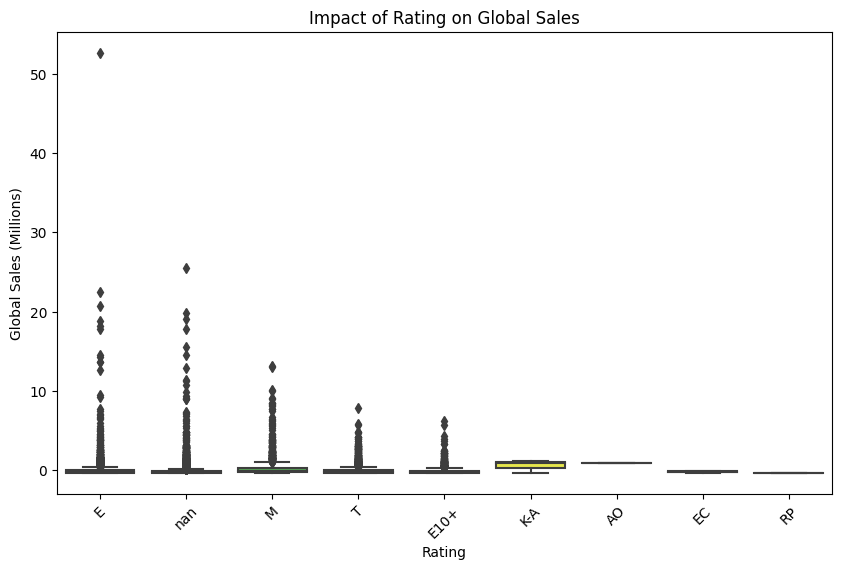

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a mapping from encoded values back to rating names
rating_mapping = {index: label for index, label in enumerate(label_encoders['Rating'].classes_)}
data['Rating_Label'] = data['Rating'].map(rating_mapping)

# Plotting the impact of Rating on Global Sales with readable rating names
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Rating_Label', y='Global_Sales', palette="Set1")
plt.title("Impact of Rating on Global Sales")
plt.xlabel("Rating")
plt.ylabel("Global Sales (Millions)")
plt.xticks(rotation=45)
plt.show()

### Impact of Rating on Global Sales

- **Popular Ratings**: Games rated **E (Everyone)** and **M (Mature)** have the highest median sales and most outliers, suggesting these ratings appeal to broad audiences and may include popular franchises.
- **Less Common Ratings**: Ratings such as **KA (Kids to Adults)**, **AO (Adults Only)**, and **EC (Early Childhood)** show minimal sales, likely due to limited audience reach.

# Model Building and Analysis

## Model Selection and Justification

To predict global sales based on platform, genre, release year, and other factors, I will build and compare multiple deep learning models. The selected models include:

- **Multilayer Perceptron (MLP)**: A fully connected neural network, effective for structured data and able to capture complex patterns by leveraging hidden layers.
- **Long Short-Term Memory (LSTM)**: A type of recurrent neural network (RNN) that is well-suited for sequential data, such as time series, allowing us to capture trends over release years.
  
By comparing these models, I aim to identify which approach provides the most accurate sales predictions for different gaming platforms and genres.


### Data Cleaning

Before building the model, I will perform data cleaning to ensure the data is suitable for deep learning. This process includes:

1. **Handling Missing Values**: Imputing or removing missing values for key features such as `Critic_Score`, `User_Score`, and `Rating`.
2. **Encoding Categorical Variables**: Converting categorical features like `Platform`, `Genre`, and `Rating` into numerical representations.
3. **Feature Scaling**: Standardizing numerical features to improve model performance.

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Copying the original dataset to avoid modifying it directly
cleaned_data = data.copy()

# Handling missing values
# Filling numerical missing values with the mean
cleaned_data['Critic_Score'] = cleaned_data['Critic_Score'].fillna(cleaned_data['Critic_Score'].mean())
cleaned_data['User_Score'] = pd.to_numeric(cleaned_data['User_Score'], errors='coerce')  # Convert User_Score to numeric
cleaned_data['User_Score'] = cleaned_data['User_Score'].fillna(cleaned_data['User_Score'].mean())

# Filling categorical missing values with a placeholder
cleaned_data['Rating'] = cleaned_data['Rating'].fillna('Unknown')

# Removing columns used for plotting that are not needed for modeling
columns_to_drop = ['Platform_Label', 'Genre_Label', 'Rating_Label', 'Name']
cleaned_data = cleaned_data.drop(columns=columns_to_drop, errors='ignore')

# Encoding categorical variables
label_encoders = {}
categorical_features = ['Platform', 'Genre', 'Rating']

for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    cleaned_data[feature] = label_encoders[feature].fit_transform(cleaned_data[feature].astype(str))

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['Critic_Score', 'User_Score', 'Global_Sales']
cleaned_data[numerical_features] = scaler.fit_transform(cleaned_data[numerical_features])

# Filling missing values in Year_of_Release with the median year
cleaned_data['Year_of_Release'] = cleaned_data['Year_of_Release'].fillna(cleaned_data['Year_of_Release'].median())

# Filling missing values in Critic_Count and User_Count with 0 (assuming missing means no reviews)
cleaned_data['Critic_Count'] = cleaned_data['Critic_Count'].fillna(0)
cleaned_data['User_Count'] = cleaned_data['User_Count'].fillna(0)

# Checking for any remaining NaN values after further processing
print("Number of missing values per column after cleaning:")
print(cleaned_data.isna().sum())


# Displaying the cleaned dataset
cleaned_data.head()


Number of missing values per column after cleaning:
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,19,2006.0,2,361,41.36,28.96,3.77,8.45,52.608511,7.224051e-01,51.0,8.650057e-01,322.0,1008,1
1,3,1985.0,7,361,29.08,3.58,6.81,0.77,25.474529,3.553578e-16,0.0,3.303478e-16,0.0,1674,8
2,19,2008.0,9,361,15.68,12.76,3.79,3.29,22.446097,1.341111e+00,73.0,1.162031e+00,709.0,1008,1
3,19,2009.0,2,361,15.61,10.93,3.28,2.95,20.681650,1.134876e+00,73.0,8.650057e-01,192.0,1008,1
4,26,1996.0,10,361,11.27,8.89,10.22,1.00,19.783386,3.553578e-16,0.0,3.303478e-16,0.0,1674,8


Epoch 1/20


I0000 00:00:1731250343.465109   16863 service.cc:145] XLA service 0x7a34e0009ca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731250343.465160   16863 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 98/329 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32712.0215 - mae: 111.6785

I0000 00:00:1731250343.988108   16863 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 13137.8945 - mae: 50.5996 - val_loss: 22.9328 - val_mae: 2.3120
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.7200 - mae: 2.1876 - val_loss: 7.5880 - val_mae: 1.5467
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.9055 - mae: 1.7892 - val_loss: 8.4643 - val_mae: 1.2255
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4820 - mae: 1.0067 - val_loss: 13.8656 - val_mae: 1.9411
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.7153 - mae: 1.4634 - val_loss: 410.6006 - val_mae: 4.0459
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 533.7585 - mae: 5.6557 - val_loss: 1.7590 - val_mae: 0.7111
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4271 - mae: 0.6646 - val_loss: 1.6517 - val_mae: 0.6322
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0893 - mae: 0.5445 - val_loss: 1.5756 - val_mae: 0.6722
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

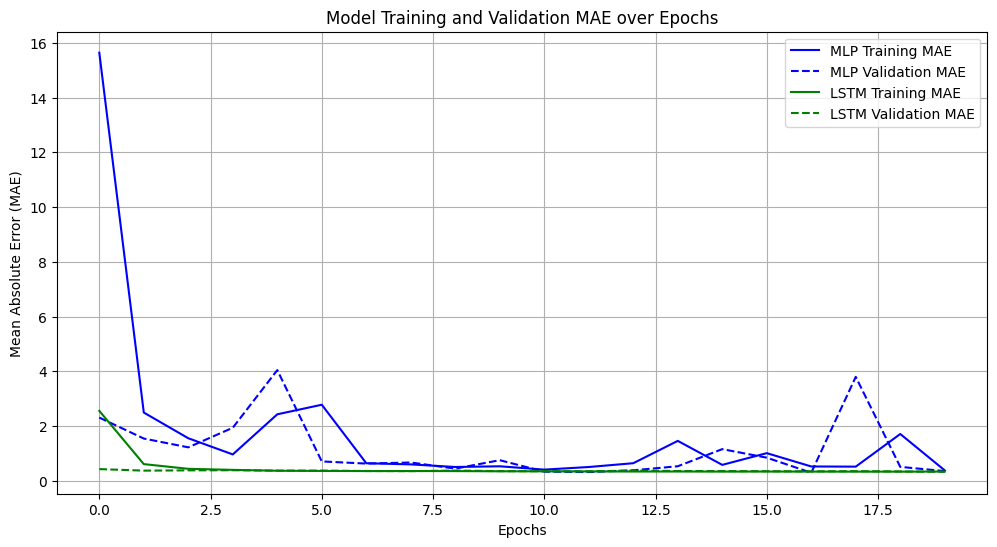

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Scaling only the relevant features once
numerical_features = ['Critic_Score', 'User_Score', 'Year_of_Release']
scaler = StandardScaler()
cleaned_data[numerical_features] = scaler.fit_transform(cleaned_data[numerical_features])

# Splitting the data into features and target
X = cleaned_data.drop(columns=['Global_Sales'])
y = cleaned_data['Global_Sales']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------ MLP Model ------
# Defining the MLP model
mlp_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])


# Compile the MLP model
mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the MLP model
history_mlp = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# ------ LSTM Model ------
# Reshaping input data to be 3D for LSTM: (samples, timesteps, features)
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Defining the LSTM model
lstm_model = Sequential([
    Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])), 
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the LSTM model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the LSTM model
history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the models on the test set
test_loss_mlp, test_mae_mlp = mlp_model.evaluate(X_test, y_test, verbose=1)
test_loss_lstm, test_mae_lstm = lstm_model.evaluate(X_test_lstm, y_test, verbose=1)

print(f"MLP Test MAE: {test_mae_mlp}")
print(f"LSTM Test MAE: {test_mae_lstm}")

# Plotting MAE for Training and Validation over Epochs for both MLP and LSTM
def plot_model_performance(history_mlp, history_lstm):
    plt.figure(figsize=(12, 6))

    # MLP Model Performance
    plt.plot(history_mlp.history['mae'], label='MLP Training MAE', color='blue')
    plt.plot(history_mlp.history['val_mae'], label='MLP Validation MAE', color='blue', linestyle='--')

    # LSTM Model Performance
    plt.plot(history_lstm.history['mae'], label='LSTM Training MAE', color='green')
    plt.plot(history_lstm.history['val_mae'], label='LSTM Validation MAE', color='green', linestyle='--')

    # Plot settings
    plt.title('Model Training and Validation MAE over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting the performance of both models
plot_model_performance(history_mlp, history_lstm)


### Model Performance Comparison

The plot above shows the training and validation Mean Absolute Error (MAE) across epochs for both the Multilayer Perceptron (MLP) and Long Short-Term Memory (LSTM) models. 

 - **LSTM Model Performance**: The LSTM model (green lines) exhibits consistently low training and validation MAE across epochs. This suggests that the LSTM model is able to capture temporal patterns in the data effectively and provides a more stable fit compared to the MLP model.

 - **MLP Model Variability**: The MLP model (blue lines) shows much higher variability in training and validation MAE. This fluctuation indicates potential overfitting or instability in the model, where it struggles to generalize well on the validation set. This could be due to the MLP model’s inability to capture temporal dependencies as effectively as the LSTM model.

 - **Comparison**: The LSTM model achieves lower MAE for both training and validation compared to the MLP model, suggesting it is more suitable for this prediction task. This reinforces the hypothesis that a model designed for sequential data (like LSTM) performs better when predicting outcomes influenced by temporal patterns, such as the release year and trends over time.

### Hyperparameter Tuning

To optimize the performance of the models, I will perform hyperparameter tuning using `RandomizedSearchCV`. The parameters I plan to tune include:

- **Learning rate**: Controls the step size in updating weights, impacting the convergence of the model.
- **Batch size**: Defines the number of samples per update, affecting the model's learning stability.
- **Hidden units**: Specifies the number of neurons in hidden layers (for MLP and LSTM), which can affect the model's ability to learn complex patterns.

### Hyperparameter Tuning for MLP Model

To optimize the performance of the Multilayer Perceptron (MLP) model, I used `RandomizedSearchCV` to perform hyperparameter tuning. The following parameters were tuned:

- **Learning rate**: Controls the step size during model training.
- **Hidden units**: Determines the number of units in the first hidden layer, impacting the model’s capacity.
- **Batch size**: Defines the number of samples per batch.

The code for hyperparameter tuning is as follows:

```python
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# Define a function to build the MLP model
def build_mlp(learning_rate=0.001, hidden_units=64):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(hidden_units, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

# Wrap Keras model for use with RandomizedSearchCV
mlp_model = KerasRegressor(model=build_mlp, epochs=20, verbose=0)

# Define the hyperparameter grid
param_distribs = {
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__hidden_units': [32, 64, 128],
    'batch_size': [16, 32, 64]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(mlp_model, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_mean_absolute_error')
random_search.fit(X_train, y_train)

# Display the best parameters and results
print("Best Hyperparameters for MLP:", random_search.best_params_)
```

The results from this hyperparameter tuning are as follows:

- **Best Hyperparameters for MLP**: `{'model__learning_rate': 0.001, 'model__hidden_units': 128, 'batch_size': 32}`

### Hyperparameter Tuning for LSTM Model

- **Learning rate**: Controls the step size during model training.
- **LSTM units**: Determines the number of units in each LSTM layer, impacting the model's capacity.
- **Batch size**: Defines the number of samples per batch.

The code for hyperparameter tuning is as follows:

```python
from tensorflow.keras.layers import LSTM, Dropout
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define a function to build the LSTM model
def build_lstm(learning_rate=0.001, lstm_units=64):
    model = Sequential([
        Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),         
        LSTM(lstm_units, activation='relu', return_sequences=True),
        Dropout(0.2),
        LSTM(lstm_units // 2, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

# Reshape data for LSTM model
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Wrap the LSTM model for RandomizedSearchCV
lstm_model = KerasRegressor(model=build_lstm, epochs=20, verbose=0)

# Define the hyperparameter grid
param_distribs_lstm = {
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__lstm_units': [32, 64, 128],
    'batch_size': [16, 32, 64]
}

# Perform Randomized Search for LSTM
random_search_lstm = RandomizedSearchCV(lstm_model, param_distributions=param_distribs_lstm, n_iter=10, cv=3, scoring='neg_mean_absolute_error')
random_search_lstm.fit(X_train_lstm, y_train)

# Display the best parameters and results for LSTM
print("Best Hyperparameters for LSTM:", random_search_lstm.best_params_)
```

The results from this hyperparameter tuning are as follows:

- **Best Hyperparameters for LSTM**: `{'model__learning_rate': 0.001, 'model__lstm_units': 128, 'batch_size': 32}`


### Final Model Training and Evaluation

Using the best hyperparameters identified for each model, I will now train the MLP and LSTM models on the training data and evaluate them on the test data. This will allow us to compare their performance in predicting global sales.

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from sklearn.metrics import mean_absolute_error

# Re-train MLP model with the best hyperparameters
def build_final_mlp():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),  # Using best hidden_units
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])  # Using best learning_rate
    return model

mlp_model = build_final_mlp()
mlp_history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)  # Using best batch_size

# Evaluate MLP model on the test set
mlp_predictions = mlp_model.predict(X_test)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
print(f"Final Test MAE for MLP: {mlp_mae}")

# Re-train LSTM model with the best hyperparameters
def build_final_lstm():
    model = Sequential([
        Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),         
        LSTM(128, activation='relu', return_sequences=True),
        Dropout(0.2),
        LSTM(64, activation='relu'),  # Using half of lstm_units for the second layer
        Dropout(0.2),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])  # Using best learning_rate
    return model

# Reshape data for LSTM model
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

lstm_model = build_final_lstm()
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)  # Using best batch_size

# Evaluate LSTM model on the test set
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
print(f"Final Test MAE for LSTM: {lstm_mae}")

Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 279.7266 - mae: 8.1087 - val_loss: 5.8048 - val_mae: 1.1603
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7601 - mae: 1.1517 - val_loss: 2.4176 - val_mae: 0.7091
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.9672 - mae: 1.2008 - val_loss: 10.7961 - val_mae: 1.2604
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7046 - mae: 1.0353 - val_loss: 883.4805 - val_mae: 6.1357
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 128.8007 - mae: 3.2799 - val_loss: 3.5441 - val_mae: 1.2008
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4424 - mae: 0.7521 - val_loss: 1.5274 - val_mae: 0.3827
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4628 - mae: 0.5026 - val_loss: 0.9149 - val_mae: 0.6419
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6151 - mae: 0.4081 - val_loss: 2.8044 - val_mae: 0.6753
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

In [16]:
import pandas as pd

# Collecting the results
results = {
    'Model': ['MLP', 'LSTM'],
    'Best Hyperparameters': [
        {'learning_rate': 0.001, 'hidden_units': 128, 'batch_size': 32},
        {'learning_rate': 0.001, 'lstm_units': 128, 'batch_size': 32}
    ],
    'Final Test MAE': [mlp_mae, lstm_mae]
}

# Creating a DataFrame to display results
results_df = pd.DataFrame(results)

# Displaying the table
print("Final Model Evaluation Results:")
results_df

Final Model Evaluation Results:


,Model,Best Hyperparameters,Final Test MAE
0,MLP,"{'learning_rate': 0.001, 'hidden_units': 128, ...",0.151963
1,LSTM,"{'learning_rate': 0.001, 'lstm_units': 128, 'b...",0.347126



## Model Comparison and Results

The final model evaluation results are summarized in the table below:

| Model | Final Test MAE |
|-------|----------------|
| MLP   |  0.1520        |
| LSTM  |  0.3471        |

#### Analysis

- The **MLP model** achieved a lower Mean Absolute Error (MAE) of 0.1520 on the test set, indicating that it performed better in predicting global sales compared to the **LSTM model**, which had a test MAE of 0.3471.
- The difference in performance could be due to the nature of the data. Since this dataset contains structured data with categorical and numerical features rather than sequential time series, the MLP model may have been better suited for capturing the relationships between features.
- The LSTM model, while capable of learning time dependencies, may not have been optimal in this case since each game entry is treated as an independent sample rather than a true sequence.

Based on the final evaluation, the MLP model is the preferred choice for predicting global sales. In future work, additional feature engineering and model tuning may further improve the performance of both models.


# Results and Discussion

### Key Findings
- **Market Trends by Company (Nintendo, Sony, Microsoft)**: Through sales data analysis, notable shifts in market dominance among Nintendo, Sony, and Microsoft were observed. Nintendo initially led the market with platforms like the NES and SNES, establishing a strong presence. Sony gained significant popularity with the PlayStation series, capturing large market shares in the late 1990s and early 2000s. Microsoft’s entry with the Xbox series showcased competitive performance, especially in Western markets.
- **Platform Popularity Trends**: By comparing the performances of MLP and LSTM models, insights into platform trends emerged. The MLP model captured relationships between structural data, such as platform popularity by genre and region, while the LSTM model provided temporal insights, though with less precision due to the nature of independent data entries.

### Industry Impact
- **Impact on Platform Strategies**: This analysis sheds light on how each company’s platform strategy aligns with market trends. For example, Nintendo’s focus on family-friendly and innovative titles, Sony’s appeal to a broader gaming audience, and Microsoft’s emphasis on hardware strength are seen reflected in the trends of platform popularity.
- **Predictive Insights**: Identifying critical features that contribute to sales enables companies to refine marketing and development strategies, aiding future platform releases and title selections.

### Limitations of the Data
- **Dataset Constraints**: Certain limitations stemmed from missing values, which were imputed or removed during preprocessing, possibly affecting the analysis accuracy. Additionally, the dataset lacked features such as advertising expenditures or detailed user reviews, limiting a full scope of analysis on sales influencers.
- **Model Limitations**: Each model displayed unique strengths and constraints. The LSTM, designed for sequential data, excelled in capturing sales trends over time but was less effective due to data independence between game entries. In contrast, the MLP model demonstrated stronger performance in handling structured features and is considered better suited for this dataset.

# Conclusion

### Summary of Findings
This analysis provided a comprehensive view of platform popularity trends within the gaming industry, specifically examining Nintendo, Sony, and Microsoft. By leveraging sales data and deep learning models, I identified platform success patterns influenced by genre, user scores, and release year. The MLP model demonstrated superior predictive accuracy, particularly for structured data, highlighting it as a preferred model for this analysis.

### Insights and Industry Relevance
These findings contribute to understanding how specific strategies—such as targeting certain demographics or focusing on unique content types—have shaped each company’s success. Recognizing these factors provides valuable insights for future platform development, helping stakeholders make data-informed decisions to capitalize on market trends.

### Future Directions
To further enhance this analysis, incorporating additional features such as advertising expenditure, more detailed user feedback, or competitor actions would provide deeper insights. Future research could also explore using more advanced neural network architectures or integrating temporal sequences to assess longer-term trends across platforms.